In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LinearRegression


#We parse the data as datetime type to be able to manipulate dates as data and not strings
parsed_date = ['date']
df = pd.read_csv('kc_house_data.csv', parse_dates=parsed_date) 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [35]:
df.replace({'sqft_basement': '?'}, {'sqft_basement': 0}, inplace=True)

In [41]:
df['sqft_basement'] = df['sqft_basement'].map(lambda x: float(x))

In [42]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,sqft_living_log,sqft_living15_log,sqft_basement_log
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.004180,0.011581,-0.023721,...,-0.012019,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,-0.003730,-0.001878,-0.003215,-0.024512
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.276297,0.395739,0.036031,...,0.129603,-0.053409,0.306687,0.022047,0.585267,0.082849,0.891746,0.611846,0.543857,0.307844
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002303,0.080922,0.023440,...,0.019429,-0.158588,-0.011595,0.136561,0.404532,0.031892,0.350871,0.637670,0.418235,0.445047
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.067281,0.186446,-0.126443,...,0.051044,-0.204778,0.024301,0.224889,0.569878,0.088297,0.551270,0.762133,0.571791,0.359525
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.110228,0.282528,-0.059397,...,0.055654,-0.199793,0.052178,0.241200,0.756400,0.184337,0.695209,0.954607,0.732179,0.616625
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.023142,0.075295,-0.008806,...,0.004511,-0.129582,-0.085507,0.230222,0.144756,0.718203,0.100032,0.150098,0.145155,0.128929
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.021879,0.028424,-0.264013,...,0.003525,-0.059522,0.049280,0.125912,0.280072,-0.010734,0.310665,0.367556,0.275443,-0.178552
waterfront,-0.004180,0.276297,-0.002303,0.067281,0.110228,0.023142,0.021879,1.000000,0.406654,0.017656,...,0.087243,0.031059,-0.012768,-0.039869,0.088858,0.032000,0.180529,0.083379,0.081090,0.076768
view,0.011581,0.395739,0.080922,0.186446,0.282528,0.075295,0.028424,0.406654,1.000000,0.045776,...,0.100960,0.085284,0.006154,-0.077907,0.279554,0.073328,0.345478,0.245358,0.263125,0.215245
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.017656,0.045776,1.000000,...,-0.061840,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,0.038855,-0.049584,-0.089150,0.189623


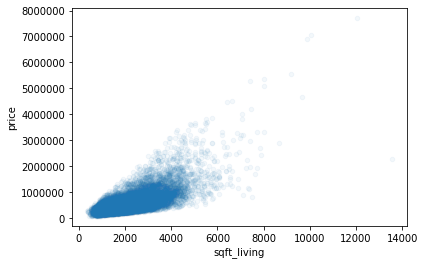

In [6]:
df.plot.scatter(x='sqft_living', y='price', alpha = .05)

In [38]:
for column in df.loc[:,['price', 'sqft_living', 'sqft_living15', 'sqft_basement']]:
    df[column+str('_log')] = df[column].map(lambda x: np.log(x))

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [67]:
df['sqft_basement_dummy'] = df['sqft_basement'].map(lambda x: 1 if x> 0 else 0)


In [138]:
df['yr_old'] = df['yr_built'].map(lambda x: 2015 - x)

In [139]:
df.column

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_log',
       'sqft_living_log', 'sqft_living15_log', 'sqft_basement_log',
       'sqft_basement_dummy', 'yr_old'],
      dtype='object')

In [140]:
df['yr_old'].head()

0    60
1    64
2    82
3    50
4    28
Name: yr_old, dtype: int64

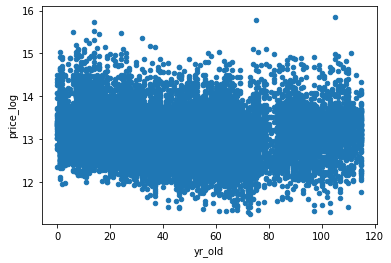

In [141]:
df.plot.scatter(x='yr_old', y='price_log')

In [40]:
remove = df.loc[df['bedrooms'] == 33]
df = df.drop(remove.index, axis=0, inplace=False)

In [207]:
y = df['price_log']
X = df.loc[:,['grade', 'sqft_living_log', 'sqft_basement_dummy', 'sqft_living15_log', 'floors']]

In [208]:
X = sm.add_constant(X) #x is sqft_living
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))



R2 = 0.57
const                  7.8729
grade                  0.1954
sqft_living_log        0.2546
sqft_basement_dummy    0.1502
sqft_living15_log      0.2189
floors                 0.0323
dtype: float64


In [209]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     5648.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:51:02   Log-Likelihood:                -7760.2
No. Observations:               21596   AIC:                         1.553e+04
Df Residuals:                   21590   BIC:                         1.558e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.8729      0.066    120.192      0.000       7.744       8.001
grade                   0.1954      0.003     58.877      0.000       0.189       0.202
sqft_living_log         0.2546      0.010     24.929      0.000       0.235       0.275
sqft_basement_dummy     0.1502      0.005     27.446      0.000       0.139       0.161
sqft_living15_log       0.2189      0.012     18.916      0.000       0.196       0.242
floors                  0.0323      0.005      6.102      0.000       0.022       0.043
==============================================================================
Omnibus:                       72.012   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.676
Skew:                           0.141   Prob(JB):                     1.65e-16
Kurtosis:                       2.966   Cond. No.                         372.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log interpretation:
    For a 10% increase in sqft of living, all other variables remaining equal (or unchanged) we would expect the price to increase by 2.5% [(((1.1^0.25)-1)*100]

In [187]:
conditions1 = df.loc[(df['sqft_living'] < 3000) & (df['sqft_living'] > 1400)]

In [188]:
conditions2 = df.loc[(df['sqft_living'] < 1400)]

In [175]:
conditions1.shape

(16989, 27)

In [176]:
conditions2.shape

(1414, 27)

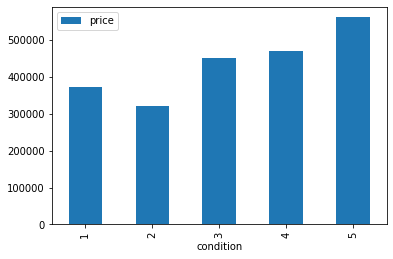

In [189]:
g1 = conditions1.groupby('condition').median()

g1.plot.bar(y='price')



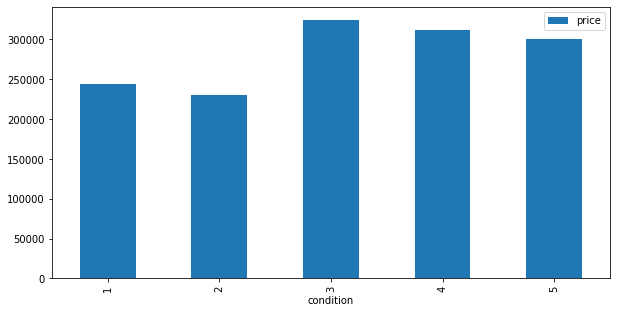

In [195]:
g2 = conditions2.groupby('condition').median()

g2.plot.bar(y='price', figsize=(10,5))

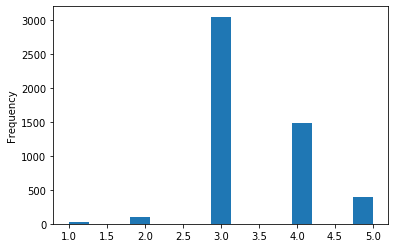

In [200]:
conditions2.condition.plot.hist(bins=15)

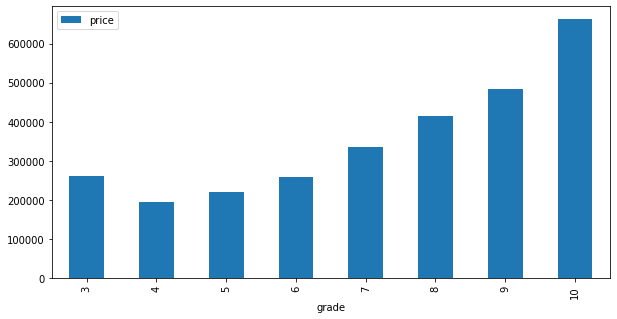

In [196]:
g3 = conditions2.groupby('grade').median()

g3.plot.bar(y='price', figsize=(10,5))